In [1]:


from itertools import product
from datasets import load_dataset,load_from_disk
import config
import os
import pandas as pd
import util
import torch
import plotting


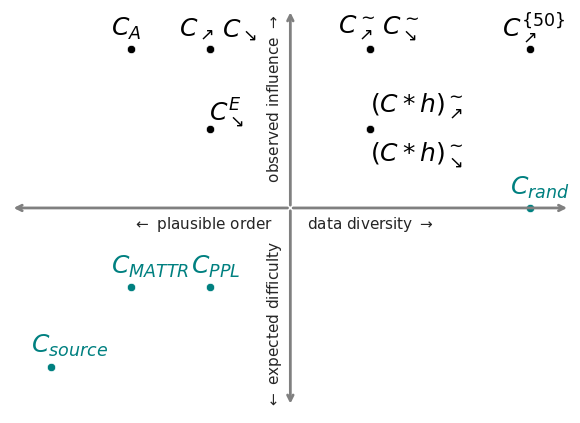

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os  # Make sure os is imported

data = {
    "source_difficulty.pt": (-3,-2),
    "mattr_increasing.pt": (-2,-1),
    "perplexity_increasing.pt": (-1,-1),
    "_influence_epoch_repetition.pt": (-1,1),
    "_influence_decr_cp_dirac.pt": (-1,2),
    "_influence_incr_cp_dirac.pt": (-1,2),
    "_influence_decr_bins_lognorm.pt": (1,1),
    "_influence_decr_bins_dirac.pt": (1,2),
    "_influence_incr_bins_lognorm.pt": (1,1),
    "_influence_incr_bins_dirac.pt": (1,2),
    "_influence_top_50_cp_shuffled.pt": (3,2),
    "_influence_tracin_sandwich.pt": (-2,2),
    "random.pt": (3,0),
}

df = pd.DataFrame(data).T.rename({0: "x", 1: "y"}, axis=1)

label_offsets = {
    "_influence_epoch_repetition.pt": (-0.02,0),
    "_influence_decr_cp_dirac.pt": (0.15,0.1),
    "_influence_incr_cp_dirac.pt": (-0.4,0.1),
    "_influence_top_50_cp_shuffled.pt": (-0.350,0.050),
    "_influence_incr_bins_lognorm.pt": (-0,0.1),
    "_influence_decr_bins_lognorm.pt": (-0,-0.5),
    "_influence_incr_bins_dirac.pt": (-0.4,0.1),
    "_influence_decr_bins_dirac.pt": (0.15,0.1)
}


color_map = {
   
    # "_influence_decr_cp_dirac.pt": "gray",
    # "_influence_incr_cp_dirac.pt": "gray",
    # "_influence_decr_bins_dirac.pt": "gray",
    # "_influence_incr_bins_dirac.pt": "gray",


 
}
color_map = color_map | {key:"teal" for key in config.baseline_curricula}

sns.set_style("whitegrid", {'axes.grid': False})
plt.figure(figsize=(6, 4.5))

ax = plt.gca()


for label, row in df.iterrows():
    color = color_map.get(label, "black")  
    sns.scatterplot(x=[row["x"]], y=[row["y"]], color=color, ax=ax)


for label, row in df.iterrows():
    renamed = util.rename(label)
    offset_x, offset_y = label_offsets.get(label, (-0.25, 0.1))  
    color = color_map.get(label, "black")  
    plt.text(row["x"] + offset_x, row["y"] + offset_y, renamed, fontsize=18, ha='left', va='bottom', color=color)


plt.text(-1.1, -0.2, "$\leftarrow$ plausible order", fontsize=11, ha='center', va='center', rotation=0)
plt.text(1, -0.2, "data diversity $\\rightarrow$", fontsize=11, ha='center', va='center', rotation=0)
plt.text(-0.2, 1.35, " observed influence $\\rightarrow$", fontsize=11, ha='center', va='center', rotation=90)
plt.text(-0.2, -1.5, " $\leftarrow$ expected difficulty", fontsize=11, ha='center', va='center', rotation=90)

# Set spine and arrow properties
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

arrowprops = dict(facecolor='black', edgecolor='black', linewidth=2)
ax.annotate('', xy=(3.5, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='gray', lw=2))
ax.annotate('', xy=(0, 2.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='gray', lw=2))
ax.annotate('', xy=(0, -2.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='gray', lw=2))
ax.annotate('', xy=(-3.5, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='gray', lw=2))

# Ticks + scale
plt.xticks(range(-5, 6))
plt.yticks(range(-2, 11))

plt.xlim(-3.51, 3.51)
ax.set_ylabel('')
ax.set_xlabel('')
plt.ylim(-2.5, 2.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()

save_path = os.path.join("./autogenerated_figures", "curricula_compass.pdf")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()
